In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
##그래프의 결과를 출력 세션에 나타나게 하자
%matplotlib inline 
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path ='C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Can't find your system.")

In [3]:
#읍면동 구분하는 함수
def sort_dong(df):
    a=df.split(" ")
    if a[1][-1]=='동':
        return '동'
    elif a[1][-1]=='면':
        return '면'
    else :
        return '읍'
#동 구분하는 함수
def sort_dong2(df):
    a=df.split(" ")
    return a[1]
#년도 추출
def year(df):
    return df[:-2]
#평수 분해
def pyeong(df):
    if df< 33:
        return '10평 미만'
    elif df>= 33 and df < 66:
        return '10~20평'
    elif df>= 66 and df < 99:
        return '20~30평'
    elif df>= 99 and df < 132:
        return '30~40평'
    elif df>= 132 and df < 165:
        return '40~50평'
    elif df>= 165 and df < 198:
        return '50~60평'
    else:
        return '60평 이상'
def mon(df):
    return df[-2:]
def pyeong2(df):
    return int(df/3.3)
def riri(df):
    return int(float(df.replace(',','')))
def rep(df):
    if df == '-':
        return 0
    elif df.find('m이상') != -1:
        return df.replace('m이상','')
    else:
        return df.replace('m미만','')

In [4]:
data1 = pd.read_csv('3.세종시_아파트(매매)_실거래가.csv')
data2 = pd.read_csv('4.세종시_연립다세대(매매)_실거래가.csv')
data3 = pd.read_csv('5.세종시_단독다가구(매매)_실거래가.csv')
data4 = pd.read_csv('6.세종시_오피스텔(매매)_실거래가.csv')
data5 = pd.read_csv('7.세종시_아파트(전월세)_실거래가.csv')
data6 = pd.read_csv('8.세종시_연립다세대(전월세)_실거래가.csv')
data7 = pd.read_csv('9.세종시_단독다가구(전월세)_실거래가.csv')
data8 = pd.read_csv('10.세종시_오피스텔(전월세)_실거래가.csv')

In [5]:
data_all = pd.concat([data1,data2,data3,data4,data5,data6,data7,data8],ignore_index=True)

In [6]:
data_all['읍면동구분']=data_all['시군구'].apply(sort_dong)
data_all['읍면동']=data_all['시군구'].apply(sort_dong2)
data_all['년']=data_all['계약년월'].astype(str).apply(year)

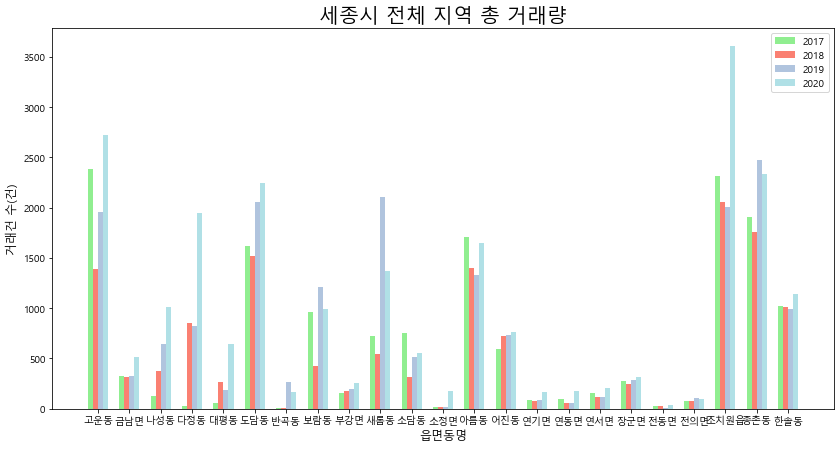

In [27]:
total_2017=data_all[data_all['년']=='2017']
total_2018=data_all[data_all['년']=='2018']
total_2019=data_all[data_all['년']=='2019']
total_2020=data_all[data_all['년']=='2020']
total_2017_a=total_2017.groupby('읍면동').count()
total_2018_a=total_2018.groupby('읍면동').count()
total_2019_a=total_2019.groupby('읍면동').count()
total_2020_a=total_2020.groupby('읍면동').count()
total_2020_a=total_2020_a.drop(['가람동','해밀동'])
def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
value_a_x = create_x(5, 0.8, 1, 23)
value_b_x = create_x(5, 0.8, 2, 23)
value_c_x = create_x(5, 0.8, 3, 23)
value_d_x = create_x(5, 0.8, 4, 23)
plt.figure(figsize=(14,7))
ax = plt.subplot()
ax.bar(value_a_x,list(total_2017_a['계약년월'].values),label='2017',color="lightgreen")#,width=0.5,color="blue")
ax.bar(value_b_x,list(total_2018_a['계약년월'].values),label='2018',color="salmon")#,width=0.5,color="r")
ax.bar(value_c_x,list(total_2019_a['계약년월'].values),label='2019',color="lightsteelblue")#,width=0.5,color="g")
ax.bar(value_d_x,list(total_2020_a['계약년월'].values),label='2020',color="powderblue")#,width=0.5,color="y")
middle_x = [(a+b+c+d)/4 for (a,b,c,d) in zip(value_a_x, value_b_x, value_c_x, value_d_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(list(total_2017_a.index))
a='세종시 전체 지역 총 거래량'
plt.xlabel('읍면동명',fontsize=12)
plt.ylabel('거래건 수(건)',fontsize=12)
plt.title(a,fontsize=20)
plt.legend()
plt.savefig(a+'.png')
plt.show()

In [19]:
data_to = pd.DataFrame([list(total_2017_a['계약년월'].values), list(total_2018_a['계약년월'].values),list(total_2019_a['계약년월'].values),list(total_2020_a['계약년월'].values)], columns =list(total_2017_a.index)) 
data_to=data_to.T
data_to.columns=['2017','2018','2019','2020']

,2017,2018,2019,2020
고운동,2389,1388,1960,2723
금남면,326,311,323,514
나성동,125,375,643,1012
다정동,24,855,824,1950
대평동,62,265,186,648
도담동,1614,1524,2058,2243
반곡동,4,10,262,169
보람동,961,423,1211,996
부강면,156,181,200,253
새롬동,724,542,2107,1370


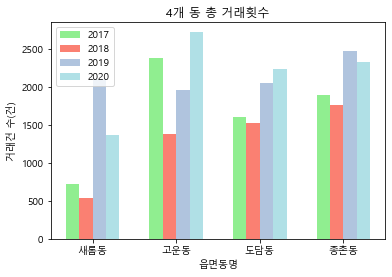

In [10]:
total_2017_a=total_2017.groupby('읍면동').count()
total_2018_a=total_2018.groupby('읍면동').count()
total_2019_a=total_2019.groupby('읍면동').count()
total_2020_a=total_2020.groupby('읍면동').count()
total_2020_a=total_2020_a.drop(['가람동','해밀동'])
#total_2017_ab=total_2017_a['새롬동','고운동','도담동','종촌동']
total_2017_ab=total_2017_a.loc[['새롬동','고운동','도담동','종촌동']]
total_2018_ab=total_2018_a.loc[['새롬동','고운동','도담동','종촌동']]
total_2019_ab=total_2019_a.loc[['새롬동','고운동','도담동','종촌동']]
total_2020_ab=total_2020_a.loc[['새롬동','고운동','도담동','종촌동']]
def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
value_a_x = create_x(5, 0.8, 1, 4)
value_b_x = create_x(5, 0.8, 2, 4)
value_c_x = create_x(5, 0.8, 3, 4)
value_d_x = create_x(5, 0.8, 4, 4)
plt.figsize=(50,50)
ax = plt.subplot()
ax.bar(value_a_x,list(total_2017_ab['계약년월'].values),label='2017',color="lightgreen")#,width=0.5,color="blue")
ax.bar(value_b_x,list(total_2018_ab['계약년월'].values),label='2018',color="salmon")#,width=0.5,color="r")
ax.bar(value_c_x,list(total_2019_ab['계약년월'].values),label='2019',color="lightsteelblue")#,width=0.5,color="g")
ax.bar(value_d_x,list(total_2020_ab['계약년월'].values),label='2020',color="powderblue")#,width=0.5,color="y")
middle_x = [(a+b+c+d)/4 for (a,b,c,d) in zip(value_a_x, value_b_x, value_c_x, value_d_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(list(total_2017_ab.index))
a='4개 동 총 거래횟수'
plt.xlabel('읍면동명')
plt.ylabel('거래건 수(건)')
plt.title(a)
plt.legend()
plt.savefig(a+'.png')
plt.show()